In [3]:
from pose_vis.extensions.hands import HandsExtension
from pose_vis.pose_vis_config import PoseVisMode, PoseVisConfiguration
from pose_vis.pose_vis import PoseVisRunner

# Run the graph in "image streaming" mode
# This runs the ImageStream node in pose_vis/image_stream.py
# It will load all images in the given directory and run them through
# the graph until all are processed, then closes the graph
# We also enable image and pose data logging, outputting to
# logs/logging_example.h5
config = PoseVisConfiguration(mode = PoseVisMode.IMAGE_STREAMING,
    image_streaming_directory = "../images",
    image_streaming_framerate = 30,
    enabled_extensions = [HandsExtension()],
    device_ids = [],
    device_resolutions = {},
    display_framerate = 0,
    log_directory = "../logs",
    log_name = "logging_example",
    log_images = True,
    log_poses = True)

PoseVisRunner(config).run()
# Unfortunately Jupyter doesn't grab the child process output

	- STREAM0/OUTPUT_EXTENSIONS has no subscribers
	- STREAM0/OUTPUT_FRAMES has no subscribers
This could mean that there are publishers and/or subscribers of Cthulhu streams that Labgraph doesn't know about, and/or that data in some topics is being discarded.


PoseVis: building graph
PoseVis: enabling extension: HandsExtension
PoseVis: creating image stream
PoseVis: enabling image logging for stream 0 with the following path: image_stream_0
PoseVis: enabling pose data logging for stream 0 with the following path: extension_stream_0
PoseVis: running graph


[landmark {
  x: 0.3666782
  y: 0.6836816
  z: 1.3609244e-06
}
landmark {
  x: 0.40242448
  y: 0.667752
  z: -0.18654017
}
landmark {
  x: 0.39794287
  y: 0.5872192
  z: -0.24172299
}
landmark {
  x: 0.40340263
  y: 0.49869713
  z: -0.24058115
}
landmark {
  x: 0.3927693
  y: 0.40063044
  z: -0.22521572
}
landmark {
  x: 0.27260906
  y: 0.47896463
  z: -0.25453687
}
landmark {
  x: 0.25475854
  y: 0.33122495
  z: -0.31093124
}
landmark {
  x: 0.24936885
  y: 0.23572053
  z: -0.34202737
}
landmark {
  x: 0.26004127
  y: 0.16758552
  z: -0.3568705
}
landmark {
  x: 0.2801903
  y: 0.47701693
  z: -0.14896862
}
landmark {
  x: 0.30427077
  y: 0.33153397
  z: -0.19376588
}
landmark {
  x: 0.37751722
  y: 0.2612969
  z: -0.21913196
}
landmark {
  x: 0.4529705
  y: 0.23412205
  z: -0.23570204
}
landmark {
  x: 0.29964173
  y: 0.47477144
  z: -0.049662407
}
landmark {
  x: 0.3382794
  y: 0.3543827
  z: -0.105578855
}
landmark {
  x: 0.41483483
  y: 0.31347528
  z: -0.16686752
}
landmark {
  x:

Text(0.5, 1.0, 'Overlayed')

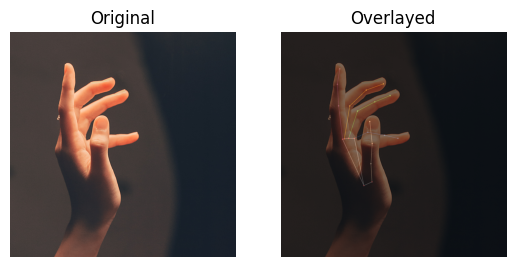

In [5]:
import os
import cv2
import matplotlib.pyplot as plt
from labgraph.loggers.hdf5.reader import HDF5Reader
from pose_vis.video_stream import ProcessedVideoFrame
from pose_vis.extension import CombinedExtensionResult

# Let's load the hdf5 log
path = os.path.join(os.path.dirname(os.path.abspath('')), "webcam/logs/logging_example.h5")
# When log_images = True images are placed in the image_stream_n path
# where n is the stream id
# Same goes for extensions, extension_stream_n
log_types = {"image_stream_0": ProcessedVideoFrame, "extension_stream_0": CombinedExtensionResult}
reader = HDF5Reader(path, log_types)
logs = reader.logs

# Since the images directory only contains 1 image, there should only be 1 set of messages
image_message: ProcessedVideoFrame = logs["image_stream_0"][0]
extension_message: CombinedExtensionResult = logs["extension_stream_0"][0]

# Image arrays are flattened for logging. We need to reshape them for presentation
# CV2 uses H x W
original_image = image_message.original.reshape(image_message.resolution[1], image_message.resolution[0], 3)
overlayed_image = image_message.overlayed.reshape(image_message.resolution[1], image_message.resolution[0], 3)
# We should also convert from BGR to RGB for matplotlib
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
overlayed_image = cv2.cvtColor(overlayed_image, cv2.COLOR_BGR2RGB)

# Let's take a look at the images
fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.imshow(original_image)
plt.axis("off")
plt.title("Original")
fig.add_subplot(1, 2, 2)
plt.imshow(overlayed_image)
plt.axis("off")
plt.title("Overlayed")

# We can view the data that the hands extension produced
print(extension_message.results["HandsExtension"])